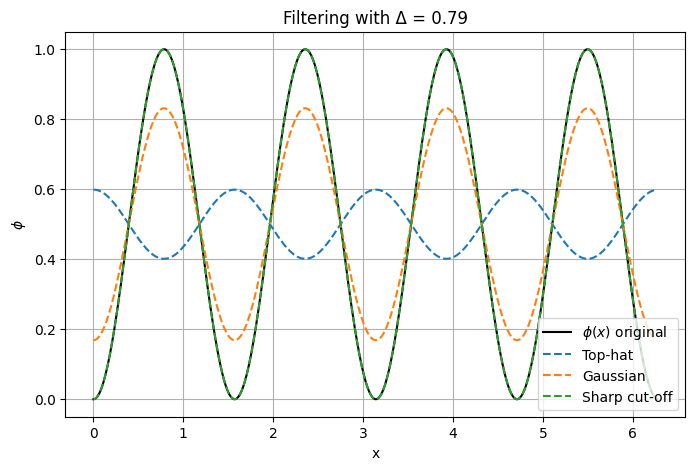

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 512
L = 2 * np.pi
x = np.linspace(0, L, N, endpoint=False)
k = np.fft.fftfreq(N, d=L/N) * 2 * np.pi  # wavenumbers

# Define the field φ(x) = 0.5 - 0.5 cos(2kx)
k0 = 2.0          # base wavenumber
phi = 0.5 - 0.5 * np.cos(2 * k0 * x)

# Fourier transform
phi_hat = np.fft.fft(phi)

# Choose filter width Δ
Delta = L / 8.0

# --- Define filters in Fourier space ---
sigma = Delta / np.sqrt(12)
G_tophat = np.sinc(k * Delta / (2))       # sinc(x) = sin(πx)/(πx)
G_gaussian = np.exp(-0.5 * (k * sigma)**2)
k_c = 2*np.pi / Delta
G_cutoff = np.where(np.abs(k) <= k_c, 1.0, 0.0)

# --- Apply filters ---
phi_tophat = np.fft.ifft(phi_hat * G_tophat).real
phi_gaussian = np.fft.ifft(phi_hat * G_gaussian).real
phi_cutoff = np.fft.ifft(phi_hat * G_cutoff).real

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(x, phi, 'k', label=r'$\phi(x)$ original')
plt.plot(x, phi_tophat, '--', label='Top-hat')
plt.plot(x, phi_gaussian, '--', label='Gaussian')
plt.plot(x, phi_cutoff, '--', label='Sharp cut-off')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\phi$')
plt.title(f'Filtering with Δ = {Delta:.2f}')
plt.grid(True)
plt.show()


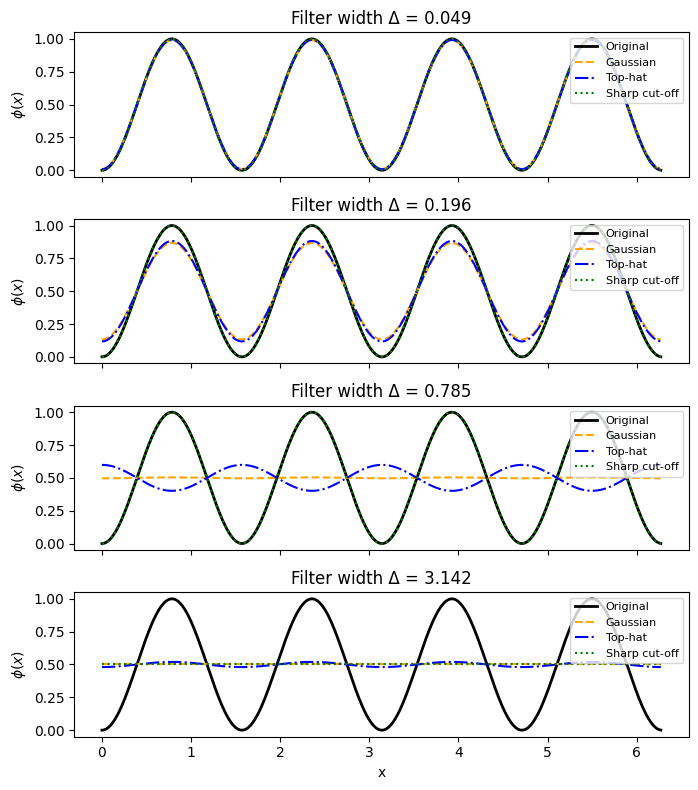

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Define the base field φ(x) = 0.5 - 0.5*cos(2kx)
# -------------------------------
N = 512
L = 2 * np.pi
x = np.linspace(0, L, N, endpoint=False)
k0 = 2.0  # base wavenumber
phi = 0.5 - 0.5 * np.cos(2 * k0 * x)

# -------------------------------
# Fourier-space setup
# -------------------------------
kx = np.fft.fftfreq(N, d=L/N) * 2 * np.pi
phi_hat = np.fft.fft(phi)

# -------------------------------
# Filter definitions
# -------------------------------
def gaussian_filter_hat(kx, delta):
    return np.exp(-0.5 * (kx * delta)**2)

def top_hat_filter_hat(kx, delta):
    return np.sinc(kx * delta / (2))  # sinc(x) = sin(pi x)/(pi x)

def sharp_cutoff_filter_hat(kx, delta):
    k_c = np.pi / delta
    return np.where(np.abs(kx) <= k_c, 1.0, 0.0)

# -------------------------------
# Filtering function
# -------------------------------
def apply_filter(phi_hat, filter_hat):
    return np.fft.ifft(phi_hat * filter_hat).real

# -------------------------------
# Sweep over filter widths Δ
# -------------------------------
deltas = [L/128, L/32, L/8, L/2]  # from fine to very coarse filtering

fig, axs = plt.subplots(len(deltas), 1, figsize=(7, 8), sharex=True)

for i, delta in enumerate(deltas):
    # Compute filtered fields
    G = gaussian_filter_hat(kx, delta)
    T = top_hat_filter_hat(kx, delta)
    S = sharp_cutoff_filter_hat(kx, delta)

    phi_G = apply_filter(phi_hat, G)
    phi_T = apply_filter(phi_hat, T)
    phi_S = apply_filter(phi_hat, S)

    # Plot comparison
    ax = axs[i]
    ax.plot(x, phi, 'k', lw=2, label='Original')
    ax.plot(x, phi_G, 'orange', ls='--', label='Gaussian')
    ax.plot(x, phi_T, 'blue', ls='-.', label='Top-hat')
    ax.plot(x, phi_S, 'green', ls=':', label='Sharp cut-off')

    ax.set_ylabel(r'$\phi(x)$')
    ax.set_title(f'Filter width Δ = {delta:.3f}')
    ax.legend(loc='upper right', fontsize=8)

plt.xlabel('x')
plt.tight_layout()
plt.show()
